In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os
import re

C:\Users\Shibin Paul\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Shibin Paul\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Shibin Paul\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# dowload data from csv

In [2]:
url_csv = pd.read_csv("instaPoet.csv")

In [3]:
url_csv.head()

,web-scraper-order,web-scraper-start-url,post-src
0,1650356631-21,https://www.instagram.com/shibinjudahpaul/,https://instagram.fmaa3-2.fna.fbcdn.net/v/t51....
1,1650356631-8,https://www.instagram.com/shibinjudahpaul/,https://instagram.fmaa3-2.fna.fbcdn.net/v/t51....
2,1650356631-7,https://www.instagram.com/shibinjudahpaul/,https://instagram.fmaa3-2.fna.fbcdn.net/v/t51....
3,1650356631-10,https://www.instagram.com/shibinjudahpaul/,https://instagram.fmaa3-2.fna.fbcdn.net/v/t51....
4,1650356631-13,https://www.instagram.com/shibinjudahpaul/,https://instagram.fmaa3-2.fna.fbcdn.net/v/t51....


In [7]:
url_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      24 non-null     object
 1   web-scraper-start-url  24 non-null     object
 2   post-src               24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [12]:
for i, url in enumerate(url_csv['post-src']):
    print(i,url)

0 https://instagram.fmaa3-2.fna.fbcdn.net/v/t51.2885-15/12822411_1722575361312606_1865769385_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fmaa3-2.fna.fbcdn.net&_nc_cat=106&_nc_ohc=K2m1ecxGwxEAX9OhAhH&edm=APU89FABAAAA&ccb=7-4&oh=00_AT-hdXN69I2t_b-g7Mu5LtA6Hd3GoP__IsSjZfrtEmli6g&oe=6265BE88&_nc_sid=86f79a
1 https://instagram.fmaa3-2.fna.fbcdn.net/v/t51.2885-15/14279094_183381815429176_1955239711_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fmaa3-2.fna.fbcdn.net&_nc_cat=104&_nc_ohc=QUaIPNuMQPIAX-F7i6S&edm=ABfd0MgBAAAA&ccb=7-4&oh=00_AT-OJ8CpT1J36jBIIuU88n3iTmZ-b4DqCBxeYXvevDoZrg&oe=62646E76&_nc_sid=7bff83
2 https://instagram.fmaa3-2.fna.fbcdn.net/v/t51.2885-15/14294951_1058589124239396_1302529575_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fmaa3-2.fna.fbcdn.net&_nc_cat=100&_nc_ohc=4SPC1x5H0MEAX_0h2-o&edm=ABfd0MgBAAAA&ccb=7-4&oh=00_AT9M2sSzaJFDyPNM_HuHQlXLYGHC8CXQ5vtjgcAM0r8qag&oe=62648047&_nc_sid=7bff83
3 https://instagram.fmaa3-2.fna.fbcdn.net/v/t51.2885-15/13721097_1234707939873095_807300123_n.jpg?stp=ds

In [9]:
import urllib.request

In [11]:
urllib.request.urlretrieve(url_csv['post-src'][0],'sample1.jpg')

('sample1.jpg', <http.client.HTTPMessage at 0x141a54f580>)

In [17]:
for i, url in enumerate(url_csv['post-src']):
    img_name = 'img'+str(i)+'.jpg'
    urllib.request.urlretrieve(url,img_name)

# clean up data

In [1]:
#rename the files to a uniform name
#using os and its apis
import os

os.chdir('instaPoet_Data')
print(os.getcwd())

for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "image" + str(count)
    #f_ext = '.jpg'

    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)

C:\Users\Shibin Paul\Documents\ML_projects\TF Dev Certification\Exam Prep\instaPoet_Data


# trim out the author name

# Preprocess for tesseract


In [ ]:
#Initial run proved that the API performed better with lighter BG and darker font

In [4]:
import tempfile

import cv2
import numpy as np
from PIL import Image

IMAGE_SIZE = 640
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return cv2.bitwise_not(im_new)

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

In [60]:
img =  process_image_for_ocr('instaPoet_Data\\img170.jpg')

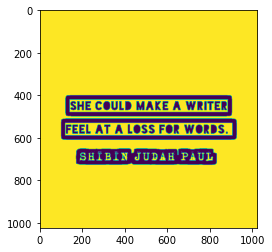

In [61]:
import matplotlib.pyplot as plt
plt.imshow(img)

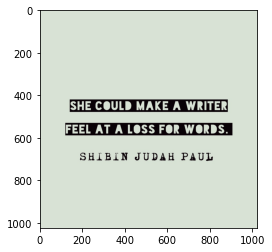

In [68]:
img=cv2.imread('instaPoet_Data\\img170.jpg')
imgrey=cv2.bitwise_not(img)
plt.imshow(imgrey)

# Extract poetry from the posts

In [2]:
#using PIL to open Images
#using Pytesseract to perform OCR on the posts
import os
from PIL import Image
import pytesseract as pyt
pyt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
postPath = "instaPoet_Data"
textPath = "instaPoet_textData\\poetry.txt"

In [5]:
for i, imageName in enumerate(os.listdir(postPath)):
    imagePath = os.path.join(postPath, imageName)
    #img = Image.open(imagePath)
    img=cv2.imread(imagePath)
    imgrey=cv2.bitwise_not(img)
    #preproc_img = process_image_for_ocr(imagePath)
    text = pyt.image_to_string(imgrey, lang='eng')
    
    txtFile = open(textPath, "a+")
    
    if i == 0:
        txtFile.write("id,img_name,poem\n")
    
    txtFile.write(str(i)+",")
    txtFile.write(imageName+",")
    txtFile.write(text+".")
    txtFile.write("\n")
    
    txtFile.close()
    
    
    

In [75]:
"""
v1 = raw ocr
v2 = preproc ocr
v3 = preproc + not ocr; best version so far
v4 = only not ocr
v5 = only not ocr + optimized images
"""
#poetry.txt needs a final duplicates check and spelling check before it can be dataframed


'\nv1 = raw ocr\nv2 = preproc ocr\nv3 = preproc + not ocr; best version so far\nv4 = only not ocr\nv5 = only not ocr + optimized images\n'

# remove punctuation and readjust index

In [4]:
targetPath = "instaPoet_textData\\poetry.txt"

In [24]:
f = open(targetPath,"r")
for i in range(10):
    print(f.readline())
f.close()

id,img_name,poem

0,image0.jpg,WE FEAR THE DARKNESS FOR WE ARE UNSURE OF ITS ENTIRETY. WE FEAR THE BEASTS FOR ITS SHARP CLAWS AND IGNORE ITS VULNERABILITY. WE FEAR THE GIANT FOR HIS SIZE AND IGNORE HIS IMMOBILITY. AND WHEN YOU REALIZE FEAR IS JUST A CONCEPT CONCOCTED BY YOUR OWN MIND, YOU ARE FREE. .

1,image1.jpg,THE DAY I DISCOVERED THERE IS NO HEAVEN, IS THE DAY I DISCOVERED THERE IS NO HELL TOO, AND THAT MADE ALL THE DIFFERENCE. .

2,image10.jpg,I WILL HOLD MY BREATH AS THE DIRT FILLS MY LUNGS AND OVERFLOWS THROUGH MY NOSTRILS. I WILL KEEP MY EYES SHUT AS IT COVERS MY FACE. I WILL STAY QUITE. I WILL NOT MOVE. I WILL STAY STILL. I WILL JUST BE. I WILL JUST BE. . 

3,image100.jpg,IT STARTED OUT WITH A TOUCH OF DESTINY, BUT ENDED WITH A KISS OF REALITY. . 

4,image101.jpg,THE VALLEY ALONG HER SPINE, THE DIMPLES ABOVE HER ARSE, THE JIGGLE IN HER BELLY, THE MUSK BETWEEN HER THIGHS, THESE ARE THE REASONS THAT BLUR THE LINE BETWEEN LUST AND LOVE. .

5,image102.jpg,SHE CAME IN TO MY B

In [5]:
f = open(targetPath,"r")
poetry_list = f.readlines()
f.close()

In [27]:
len(poetry_list)

169

In [73]:
s = poetry_list[1].split(',',2)[2]

In [79]:
s = re.sub("[.,]","",s)

In [80]:
print(s)

WE FEAR THE DARKNESS FOR WE ARE UNSURE OF ITS ENTIRETY WE FEAR THE BEASTS FOR ITS SHARP CLAWS AND IGNORE ITS VULNERABILITY WE FEAR THE GIANT FOR HIS SIZE AND IGNORE HIS IMMOBILITY AND WHEN YOU REALIZE FEAR IS JUST A CONCEPT CONCOCTED BY YOUR OWN MIND YOU ARE FREE 



In [18]:
lst=[1,2]

In [19]:
lst.append(0)

In [20]:
lst

[1, 2, 0]

In [15]:
poetry_df = pd.DataFrame.

['id,img_name,poem\n',
 '0,image0.jpg,WE FEAR THE DARKNESS FOR WE ARE UNSURE OF ITS ENTIRETY. WE FEAR THE BEASTS FOR ITS SHARP CLAWS AND IGNORE ITS VULNERABILITY. WE FEAR THE GIANT FOR HIS SIZE AND IGNORE HIS IMMOBILITY. AND WHEN YOU REALIZE FEAR IS JUST A CONCEPT CONCOCTED BY YOUR OWN MIND, YOU ARE FREE. \x0c.\n',
 '1,image1.jpg,THE DAY I DISCOVERED THERE IS NO HEAVEN, IS THE DAY I DISCOVERED THERE IS NO HELL TOO, AND THAT MADE ALL THE DIFFERENCE. \x0c.\n',
 '2,image10.jpg,I WILL HOLD MY BREATH AS THE DIRT FILLS MY LUNGS AND OVERFLOWS THROUGH MY NOSTRILS. I WILL KEEP MY EYES SHUT AS IT COVERS MY FACE. I WILL STAY QUITE. I WILL NOT MOVE. I WILL STAY STILL. I WILL JUST BE. I WILL JUST BE. \x0c. \n',
 '3,image100.jpg,IT STARTED OUT WITH A TOUCH OF DESTINY, BUT ENDED WITH A KISS OF REALITY. \x0c. \n',
 '4,image101.jpg,THE VALLEY ALONG HER SPINE, THE DIMPLES ABOVE HER ARSE, THE JIGGLE IN HER BELLY, THE MUSK BETWEEN HER THIGHS, THESE ARE THE REASONS THAT BLUR THE LINE BETWEEN LUST AND LOVE.

In [34]:
import re

In [5]:

f = open(targetPath,"r")
poetry_list = f.readlines()
p = []
for i in range(len(poetry_list)):
    if i !=0:
        l = poetry_list[i].split(',',2)[2]
        l = re.sub("[.,;?:\n\x0c]","",l)
        l = re.sub("","",l)
        p.append(l)
        #print(i,' ',l)
f.close()

In [6]:
p

['WE FEAR THE DARKNESS FOR WE ARE UNSURE OF ITS ENTIRETY WE FEAR THE BEASTS FOR ITS SHARP CLAWS AND IGNORE ITS VULNERABILITY WE FEAR THE GIANT FOR HIS SIZE AND IGNORE HIS IMMOBILITY AND WHEN YOU REALIZE FEAR IS JUST A CONCEPT CONCOCTED BY YOUR OWN MIND YOU ARE FREE ',
 'THE DAY I DISCOVERED THERE IS NO HEAVEN IS THE DAY I DISCOVERED THERE IS NO HELL TOO AND THAT MADE ALL THE DIFFERENCE ',
 'I WILL HOLD MY BREATH AS THE DIRT FILLS MY LUNGS AND OVERFLOWS THROUGH MY NOSTRILS I WILL KEEP MY EYES SHUT AS IT COVERS MY FACE I WILL STAY QUITE I WILL NOT MOVE I WILL STAY STILL I WILL JUST BE I WILL JUST BE  ',
 'IT STARTED OUT WITH A TOUCH OF DESTINY BUT ENDED WITH A KISS OF REALITY  ',
 'THE VALLEY ALONG HER SPINE THE DIMPLES ABOVE HER ARSE THE JIGGLE IN HER BELLY THE MUSK BETWEEN HER THIGHS THESE ARE THE REASONS THAT BLUR THE LINE BETWEEN LUST AND LOVE ',
 'SHE CAME IN TO MY BED OF THORNS AND TOGETHER WE MADE IT OUR BED OF SINS  ',
 'AND THEN I REALIZED SHE WAS NEVER THE MUSE IT WAS THE HEART

In [80]:
poetry_df = pd.DataFrame(data=p,columns=['poetry'])

In [81]:
type(poetry_df)

pandas.core.frame.DataFrame

In [82]:
type(p)

list

# Tokenize the corpus

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
vocab_size = 612
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'pre'
oov_tok = '<OOV>'
training_portion = .8

In [11]:
tokenizer = Tokenizer(oov_token=oov_tok)

In [12]:
tokenizer.fit_on_texts(p)

In [13]:
total_words = len(tokenizer.word_index) + 1

In [14]:
print(tokenizer.word_index)
print(total_words)

{'<OOV>': 1, 'the': 2, 'i': 3, 'her': 4, 'and': 5, 'my': 6, 'to': 7, 'she': 8, 'you': 9, 'of': 10, 'a': 11, 'that': 12, 'is': 13, 'with': 14, 'in': 15, 'it': 16, 'for': 17, 'love': 18, 'me': 19, 'do': 20, 'was': 21, 'we': 22, 'but': 23, 'this': 24, 'your': 25, 'when': 26, 'are': 27, 'all': 28, 'no': 29, 'heart': 30, 'our': 31, 'every': 32, 'will': 33, 'only': 34, 'not': 35, 'naked': 36, 'time': 37, 'never': 38, 'like': 39, 'on': 40, 'each': 41, 'see': 42, 'just': 43, 'by': 44, 'one': 45, 'pain': 46, 'they': 47, 'what': 48, 'its': 49, 'there': 50, 'out': 51, 'from': 52, 'then': 53, 'soul': 54, 'let': 55, 'saw': 56, 'back': 57, 'now': 58, 'made': 59, 'up': 60, 'or': 61, 'were': 62, 'be': 63, 'lips': 64, 'he': 65, 'his': 66, 'life': 67, 'down': 68, 'loves': 69, 'man': 70, 'last': 71, 'other': 72, 'at': 73, 'away': 74, 'ashes': 75, 'too': 76, 'eyes': 77, 'around': 78, 'as': 79, 'still': 80, 'head': 81, 'mine': 82, "i'm": 83, 'their': 84, 'way': 85, 'left': 86, 'gave': 87, 'fall': 88, 'dust

In [15]:
dict(list(tokenizer.word_index.items())[0:10])

{'<OOV>': 1,
 'the': 2,
 'i': 3,
 'her': 4,
 'and': 5,
 'my': 6,
 'to': 7,
 'she': 8,
 'you': 9,
 'of': 10}

## create ngrams

In [16]:
input_sequences = []
for line in p:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [17]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [18]:
input_sequences

array([[  0,   0,   0, ...,   0,  22, 108],
       [  0,   0,   0, ...,  22, 108,   2],
       [  0,   0,   0, ..., 108,   2, 145],
       ...,
       [  0,   0,   0, ...,  82,  26,   6],
       [  0,   0,   0, ...,  26,   6,  30],
       [  0,   0,   0, ...,   6,  30, 501]])

In [19]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [20]:
print(tokenizer.word_index['we'])
print(tokenizer.word_index['fear'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['darkness'])
print(tokenizer.word_index['for'])
print(tokenizer.word_index['we'])
print(tokenizer.word_index['are'])
print(tokenizer.word_index['unsure'])

22
108
2
145
17
22
27
574


In [21]:
xs[6]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  22, 108,   2, 145,  17,  22,  27])

In [22]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [23]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  22 108   2 145  17  22]
[0. 0. 0. ... 0. 0. 0.]


# Train a model

In [24]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [25]:
  model = Sequential()
  model.add(Embedding(total_words, 20, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 139, 20)           20380     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                6560      
_________________________________________________________________
dense (Dense)                (None, 1019)              41779     
Total params: 68,719
Trainable params: 68,719
Non-trainable params: 0
_________________________________________________________________


In [27]:
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=400, verbose=1)

Epoch 1/400
141/141 [==============================] - 11s 76ms/step - loss: 6.3669 - accuracy: 0.0320
Epoch 2/400
141/141 [==============================] - 10s 74ms/step - loss: 5.8760 - accuracy: 0.0380
Epoch 3/400
141/141 [==============================] - 10s 74ms/step - loss: 5.7942 - accuracy: 0.0380
Epoch 4/400
141/141 [==============================] - 11s 76ms/step - loss: 5.7114 - accuracy: 0.0380
Epoch 5/400
141/141 [==============================] - 11s 76ms/step - loss: 5.6483 - accuracy: 0.0382
Epoch 6/400
141/141 [==============================] - 11s 76ms/step - loss: 5.6007 - accuracy: 0.0358
Epoch 7/400
141/141 [==============================] - 11s 80ms/step - loss: 5.5614 - accuracy: 0.0398
Epoch 8/400
141/141 [==============================] - 12s 84ms/step - loss: 5.5306 - accuracy: 0.0405
Epoch 9/400
141/141 [==============================] - 11s 80ms/step - loss: 5.5046 - accuracy: 0.0440
Epoch 10/400
141/141 [==============================] - 11s 78ms/step - l

KeyboardInterrupt: 

In [145]:
import matplotlib.pyplot as plt


def plot_graphs(history, string,xlim=0,ylim=0):
    plt.plot(history.history[string])
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.grid()
    plt.show()

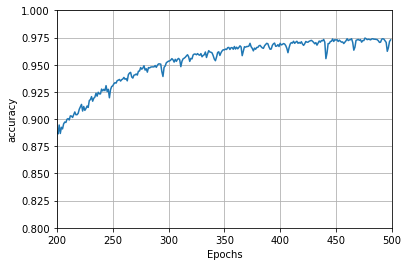

In [146]:
plot_graphs(history, 'accuracy',[200,500],[0.8,1.0])

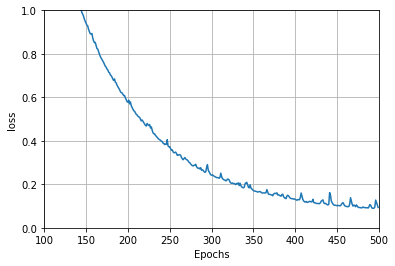

In [148]:
plot_graphs(history, 'loss',[100,500],[0,1])

In [173]:
seed_text = "girl "
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

girl  one day speak of the night the blues one letter to stir up the blues one letter to stir up the peace one letter to wreak chas one letter is all it takes and that one letter will forever stay in me love for they bont fall they fall in
